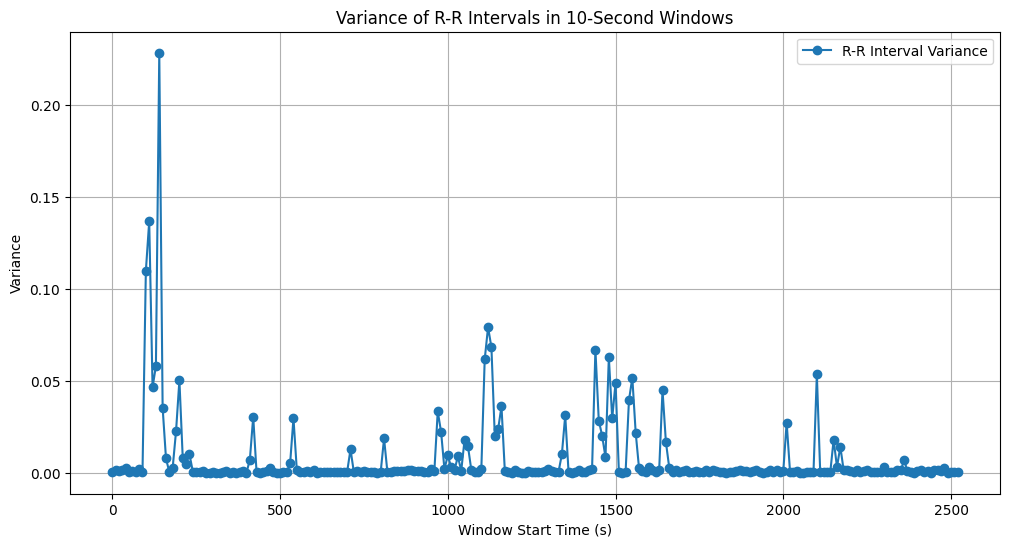

Total Duration: 2534.75 seconds
Number of 10-second Windows: 253
R-R Interval Variances: [3.78004898e-04 1.43350511e-03 1.11226358e-03 1.77682176e-03
 2.86838994e-03 2.08199024e-04 1.08028918e-03 4.16109548e-04
 1.83433612e-03 3.63089972e-04 1.09585262e-01 1.36568725e-01
 4.65125574e-02 5.79687092e-02 2.28147672e-01 3.53979203e-02
 7.87248837e-03 3.12125189e-04 2.86089316e-03 2.26341022e-02
 5.03236105e-02 7.87444909e-03 4.88242446e-03 1.01149016e-02
 6.70447152e-04 2.08059947e-04 5.61997294e-04 8.07144204e-04
 7.37404682e-05 1.19462305e-04 3.50878789e-04 8.32713380e-05
 1.24697149e-04 3.35162913e-04 9.50686325e-04 1.83196598e-04
 1.86639173e-04 9.60741724e-05 5.60114119e-04 7.85039396e-04
 6.43255759e-05 7.15921616e-03 3.04324246e-02 3.83576568e-04
 1.43373499e-04 3.32949113e-04 7.42495060e-04 2.66422058e-03
 5.71778540e-04 9.16204509e-05 1.36253785e-04 6.88967656e-04
 5.55203885e-04 5.09630539e-03 2.96723232e-02 1.45611995e-03
 2.89582476e-04 3.14828207e-04 8.19595493e-04 5.97276631e

In [7]:
import numpy as np
import pyedflib
import matplotlib.pyplot as plt

# Load the EDF file
edf_file_path = "sub-150_ses-001_task-stim_run-01_ieeg_edited_GVE_filtered5.edf"
edf = pyedflib.EdfReader(edf_file_path)

# Extract ECG signal (C131) and sampling frequency
channel_index = edf.getSignalLabels().index("C131")
ecg_signal = edf.readSignal(channel_index)
sampling_rate = edf.getSampleFrequency(channel_index)

# Get total duration
total_duration = edf.file_duration  # Should be 2534.75 seconds
edf.close()

# Verify number of windows
num_windows = int(np.floor(total_duration / 10))  # Should be 252

# Calculate R-R intervals
from scipy.signal import find_peaks

# Detect R-peaks
peaks, _ = find_peaks(ecg_signal, height=0.0001, distance=int(sampling_rate * 0.6))

# Compute R-R intervals (in seconds)
rr_intervals = np.diff(peaks) / sampling_rate

# Convert R-peak indices to time (in seconds)
r_peak_times = peaks / sampling_rate

# Segment into 10-second windows
window_size = 10
window_start_times = np.arange(0, num_windows * window_size, window_size)
variances = []

for start_time in window_start_times:
    # Find intervals within this window
    mask = (r_peak_times[:-1] >= start_time) & (r_peak_times[:-1] < start_time + window_size)
    rr_in_window = rr_intervals[mask]
    
    # Calculate variance if sufficient data points, otherwise NaN
    if len(rr_in_window) > 1:
        variances.append(np.var(rr_in_window))
    else:
        variances.append(np.nan)

# Create a numpy array of variances
variances = np.array(variances)

# Plot the variances
plt.figure(figsize=(12, 6))
plt.plot(window_start_times, variances, marker="o", label="R-R Interval Variance")
plt.xlabel("Window Start Time (s)")
plt.ylabel("Variance")
plt.title("Variance of R-R Intervals in 10-Second Windows")
plt.grid()
plt.legend()
plt.show()

# Print results for verification
print(f"Total Duration: {total_duration} seconds")
print(f"Number of 10-second Windows: {num_windows}")
print(f"R-R Interval Variances: {variances}")


In [8]:
import pyedflib

# Load the EDF file
edf_file_path = "sub-150_ses-001_task-stim_run-01_ieeg_edited_GVE_filtered5.edf"
edf = pyedflib.EdfReader(edf_file_path)

# Select the desired signal/channel (e.g., "C131")
channel_index = edf.getSignalLabels().index("C131")
signal = edf.readSignal(channel_index)

# Get the total number of samples
total_samples = len(signal)

# Print the number of samples
print(f"Total Number of Samples: {total_samples}")

# Close the EDF file
edf.close()


Total Number of Samples: 5191168


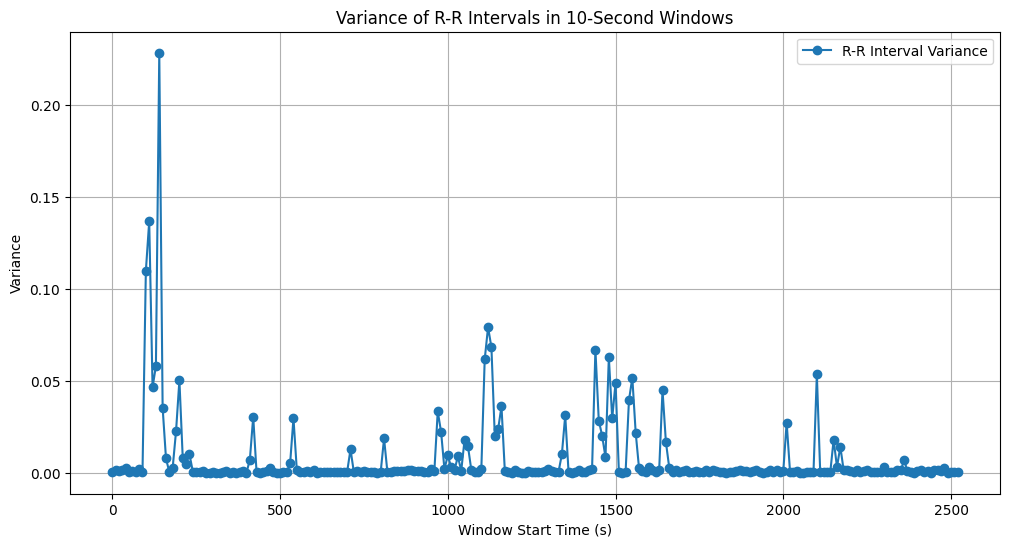

Total Samples: 5191168
Samples per Window: 20480
Number of Complete 10-second Windows: 253
R-R Interval Variances: [3.78004898e-04 1.43350511e-03 1.11226358e-03 1.77682176e-03
 2.86838994e-03 2.08199024e-04 1.08028918e-03 4.16109548e-04
 1.83433612e-03 3.63089972e-04 1.09585262e-01 1.36568725e-01
 4.65125574e-02 5.79687092e-02 2.28147672e-01 3.53979203e-02
 7.87248837e-03 3.12125189e-04 2.86089316e-03 2.26341022e-02
 5.03236105e-02 7.87444909e-03 4.88242446e-03 1.01149016e-02
 6.70447152e-04 2.08059947e-04 5.61997294e-04 8.07144204e-04
 7.37404682e-05 1.19462305e-04 3.50878789e-04 8.32713380e-05
 1.24697149e-04 3.35162913e-04 9.50686325e-04 1.83196598e-04
 1.86639173e-04 9.60741724e-05 5.60114119e-04 7.85039396e-04
 6.43255759e-05 7.15921616e-03 3.04324246e-02 3.83576568e-04
 1.43373499e-04 3.32949113e-04 7.42495060e-04 2.66422058e-03
 5.71778540e-04 9.16204509e-05 1.36253785e-04 6.88967656e-04
 5.55203885e-04 5.09630539e-03 2.96723232e-02 1.45611995e-03
 2.89582476e-04 3.14828207e-04 

In [9]:
import numpy as np
import pyedflib
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Load the EDF file
edf_file_path = "sub-150_ses-001_task-stim_run-01_ieeg_edited_GVE_filtered5.edf"
edf = pyedflib.EdfReader(edf_file_path)

# Extract ECG signal (C131) and sampling frequency
channel_index = edf.getSignalLabels().index("C131")
ecg_signal = edf.readSignal(channel_index)
sampling_rate = 2048  # Assuming 2048 samples per second

# Total number of samples in the signal
total_samples = len(ecg_signal)

# Calculate the number of complete 10-second windows based on samples
samples_per_window = 10 * sampling_rate  # 20480 samples per 10-second window
num_windows = total_samples // samples_per_window  # Integer division for complete windows

# Detect R-peaks
peaks, _ = find_peaks(ecg_signal, height=0.0001, distance=int(sampling_rate * 0.6))

# Compute R-R intervals (in seconds)
rr_intervals = np.diff(peaks) / sampling_rate

# Convert R-peak indices to time (in seconds)
r_peak_times = peaks / sampling_rate

# Segment into 10-second windows based on sample indices
variances = []
for i in range(num_windows):
    # Calculate start and end indices of the window in terms of time
    start_sample = i * samples_per_window
    end_sample = (i + 1) * samples_per_window
    start_time = start_sample / sampling_rate
    end_time = end_sample / sampling_rate

    # Find R-R intervals within this window
    mask = (r_peak_times[:-1] >= start_time) & (r_peak_times[:-1] < end_time)
    rr_in_window = rr_intervals[mask]

    # Calculate variance if sufficient data points, otherwise NaN
    if len(rr_in_window) > 1:
        variances.append(np.var(rr_in_window))
    else:
        variances.append(np.nan)

# Create a numpy array of variances
variances = np.array(variances)

# Plot the variances
plt.figure(figsize=(12, 6))
plt.plot(np.arange(num_windows) * 10, variances, marker="o", label="R-R Interval Variance")
plt.xlabel("Window Start Time (s)")
plt.ylabel("Variance")
plt.title("Variance of R-R Intervals in 10-Second Windows")
plt.grid()
plt.legend()
plt.show()

# Print results for verification
print(f"Total Samples: {total_samples}")
print(f"Samples per Window: {samples_per_window}")
print(f"Number of Complete 10-second Windows: {num_windows}")
print(f"R-R Interval Variances: {variances}")


In [13]:
import pandas as pd
variance_df = pd.DataFrame({
    "Window Start Time (s)": np.arange(num_windows) * 10,  # Start time of each 10-second window
    "R-R Interval Variance": variances  # Variance for each window
})

output_csv_path = "rr_interval_variances.csv"
variance_df.to_csv(output_csv_path, index=False)